In [42]:
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [43]:
import time
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import  StandardScaler


In [44]:
df=pd.read_csv('./LOG_AUTHENTICATION - PCA.csv',sep=',',decimal='.')
df = df.sample(n=15500)
pd.set_option('display.float_format', '{:.4f}'.format)
df.head()

,Unnamed: 0,DATA,DURATION,HORA,IP,RECEIVE,SEND
213612,213612,2015-01-24,20.0514,11:44:00,192.168.18.105,3.3731,1.6929
276964,276964,2015-01-20,12.8194,10:35:00,192.168.9.120,397.0321,0.4047
7566,7566,2015-01-29,5.9626,05:59:00,192.168.39.59,774.0490,14.2341
101717,101717,2015-01-14,6.8554,03:19:00,192.168.18.234,3.2044,1.3396
271326,271326,2015-01-29,4.2194,10:43:00,192.168.36.37,0.7739,4.6905


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15500 entries, 213612 to 165446
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  15500 non-null  int64  
 1   DATA        15500 non-null  object 
 2   DURATION    15500 non-null  float64
 3   HORA        15500 non-null  object 
 4   IP          15500 non-null  object 
 5   RECEIVE     15500 non-null  float64
 6   SEND        15500 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 968.8+ KB


In [46]:
dt=df.describe()
dt=dt[['DURATION','SEND','RECEIVE']]
dt.loc['cv']=dt.loc['std'].values/dt.loc['mean'].values
dt.loc['range']=dt.loc['max'].values - dt.loc['min'].values
dt.loc['median'] = dt.median()
dt.loc['total'] = dt.sum()
dt.loc['variance'] = dt.var()
dt

,DURATION,SEND,RECEIVE
count,15500.0000,15500.0000,15500.0000
mean,13.8492,17.4768,49.3765
std,35.1273,85.5171,152.3250
min,0.0761,0.0051,0.0358
25%,3.6002,0.9058,4.5682
50%,7.6544,3.1312,13.7521
75%,14.5328,11.0024,41.5517
max,3291.2337,5292.1058,7883.9459
cv,2.5364,4.8932,3.0850
range,3291.1576,5292.1008,7883.9101


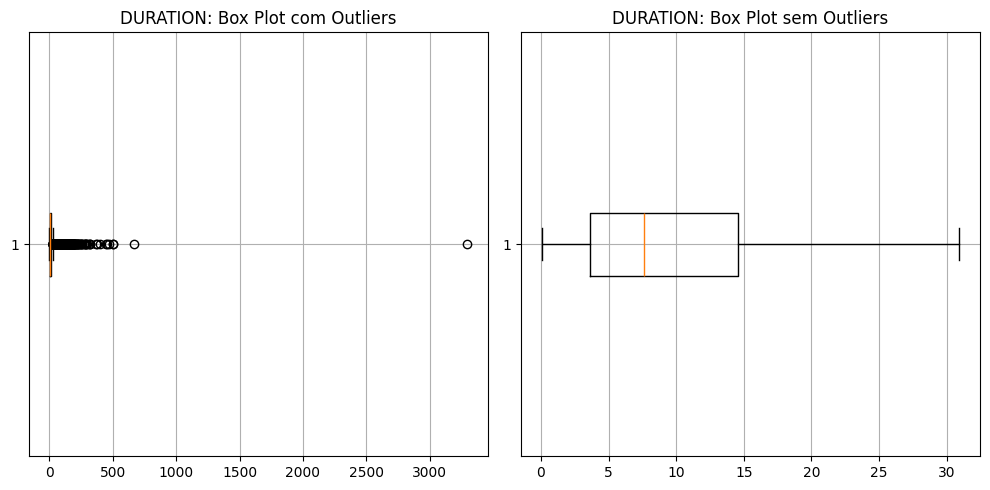

In [47]:
# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# First box plot with outliers
axs[0].boxplot(df['DURATION'], vert=False)
axs[0].grid(True, zorder=10)
axs[0].set_title('DURATION: Box Plot com Outliers')

# Second box plot without outliers
axs[1].boxplot(df['DURATION'], vert=False, showfliers=False)
axs[1].grid(True, zorder=10)
axs[1].set_title('DURATION: Box Plot sem Outliers')

# Show the plot
plt.tight_layout()
plt.savefig(f"./lista6/duration_bloxpot.png", dpi=300)  # Increase the resolution
plt.show()

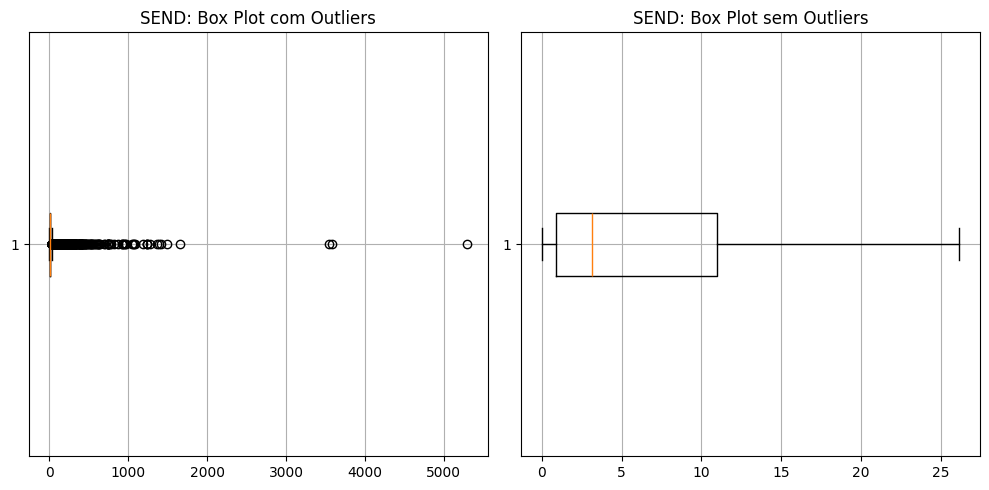

In [48]:
# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# First box plot with outliers
axs[0].boxplot(df['SEND'], vert=False)
axs[0].grid(True, zorder=10)
axs[0].set_title('SEND: Box Plot com Outliers')

# Second box plot without outliers
axs[1].boxplot(df['SEND'], vert=False, showfliers=False)
axs[1].grid(True, zorder=10)
axs[1].set_title('SEND: Box Plot sem Outliers')

# Show the plot
plt.tight_layout()
plt.savefig(f"./lista6/send_bloxpot.png", dpi=300)  # Increase the resolution
plt.show()

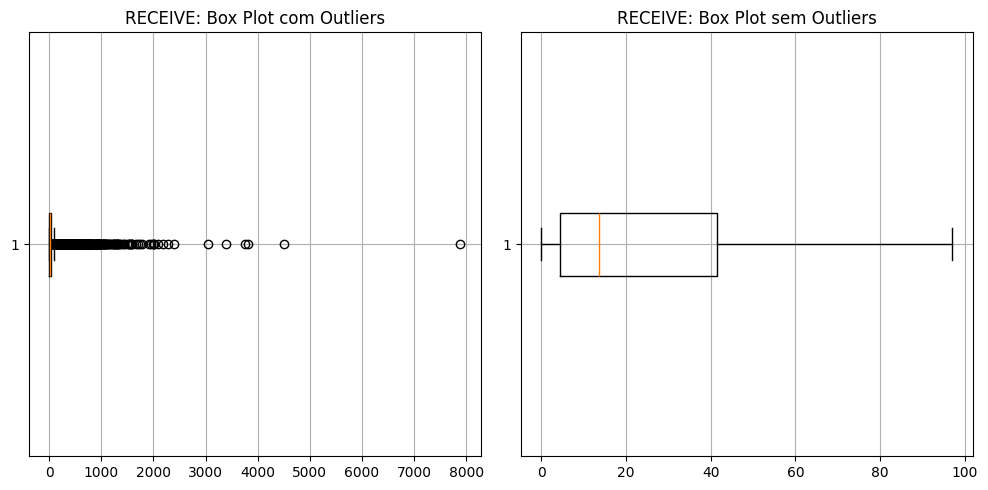

In [49]:
# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# First box plot with outliers
axs[0].boxplot(df['RECEIVE'], vert=False)
axs[0].grid(True, zorder=10)
axs[0].set_title('RECEIVE: Box Plot com Outliers')

# Second box plot without outliers
axs[1].boxplot(df['RECEIVE'], vert=False, showfliers=False)
axs[1].grid(True, zorder=10)
axs[1].set_title('RECEIVE: Box Plot sem Outliers')

# Show the plot
plt.tight_layout()
plt.savefig(f"./lista6/receive_bloxpot.png", dpi=300)  # Increase the resolution
plt.show()

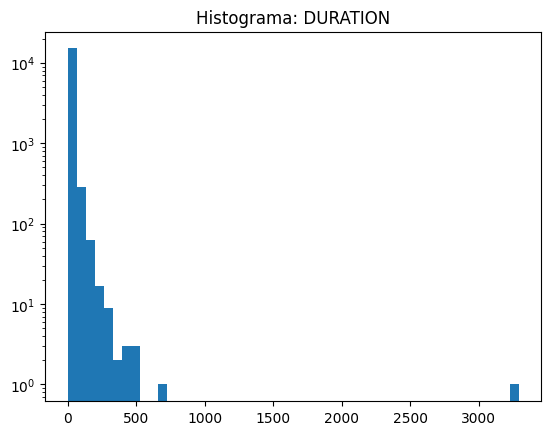

In [50]:
plt.title('Histograma: DURATION')
plt.hist(df['DURATION'], bins=50, log=True)
plt.savefig(f"./lista6/duration_hist.png", dpi=300)  # Increase the resolution
plt.show()

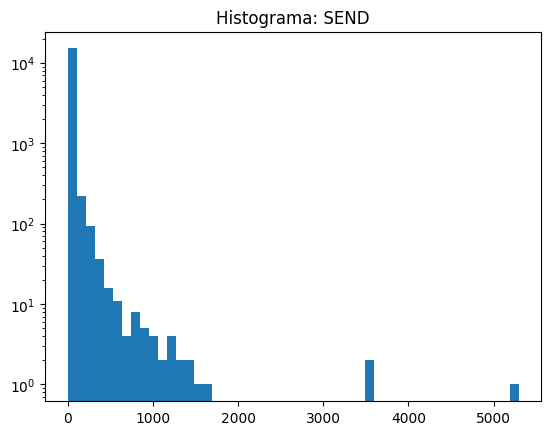

In [51]:
plt.title('Histograma: SEND')
plt.hist(df['SEND'], 50, log=True)
plt.savefig(f"./lista6/send_hist.png", dpi=300)  # Increase the resolution
plt.show()

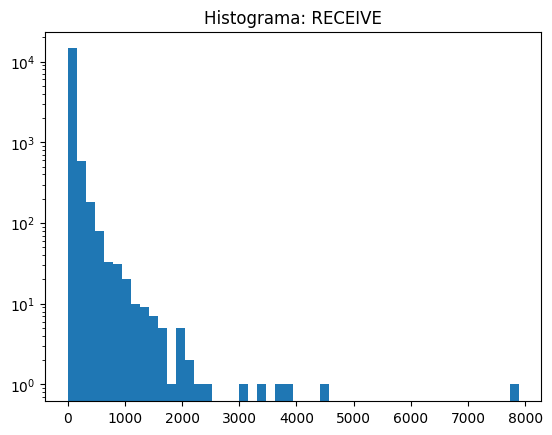

In [52]:
plt.title('Histograma: RECEIVE')
plt.hist(df['RECEIVE'], 50, log=True)
plt.savefig(f"./lista6/receive_hist.png", dpi=300)  # Increase the resolution
plt.show()

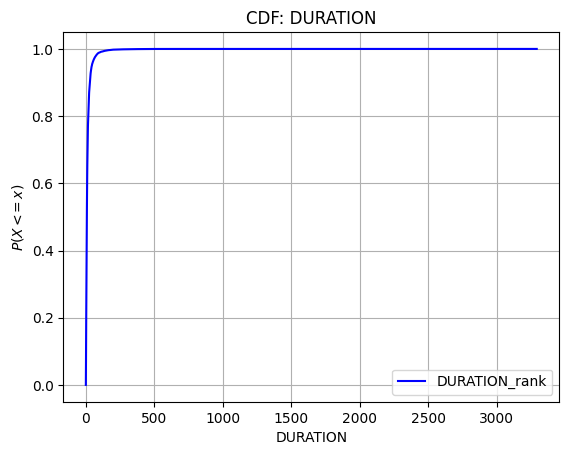

In [53]:
df['DURATION_rank'] = df['DURATION'].rank(method = 'average', pct = True)
df.sort_values('DURATION').plot(x = 'DURATION', y = 'DURATION_rank', grid = True,
 color='blue')
plt.ylabel(r"$P(X <\!\!= x)$")
plt.title("CDF: DURATION")
plt.savefig(f"./lista6/duration_cdf.png", dpi=300)  # Increase the resolution
plt.draw()

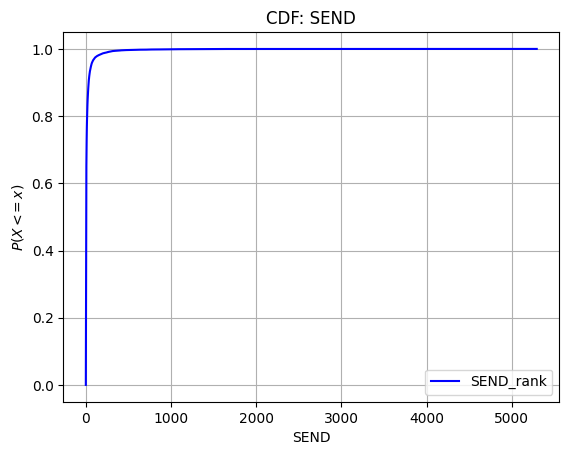

In [54]:
df['SEND_rank'] = df['SEND'].rank(method = 'average', pct = True)
df.sort_values('SEND').plot(x = 'SEND', y = 'SEND_rank', grid = True,
 color='blue')
plt.ylabel(r"$P(X <\!\!= x)$")
plt.title("CDF: SEND")
plt.savefig(f"./lista6/send_cdf.png", dpi=300)  # Increase the resolution
plt.draw()

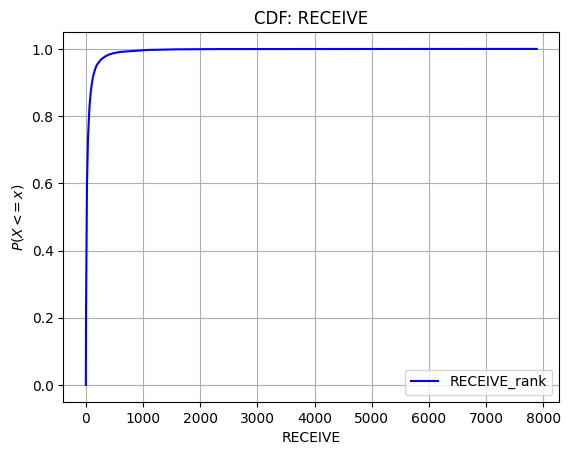

In [55]:
df['RECEIVE_rank'] = df['RECEIVE'].rank(method = 'average', pct = True)
df.sort_values('RECEIVE').plot(x = 'RECEIVE', y = 'RECEIVE_rank', grid = True,
 color='blue')
plt.ylabel(r"$P(X <\!\!= x)$")
plt.title("CDF: RECEIVE")
plt.savefig(f"./lista6/receive_cdf.png", dpi=300)  # Increase the resolution
plt.draw()

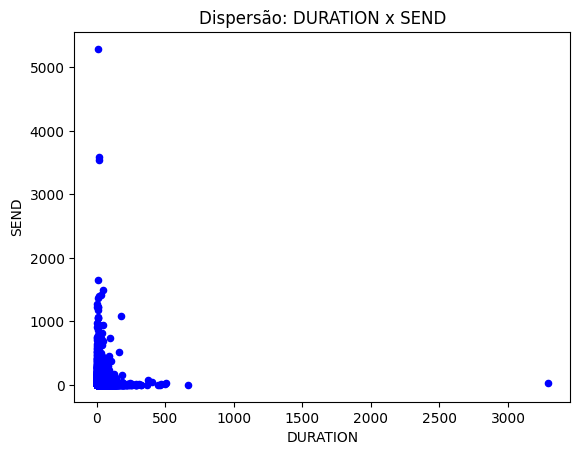

In [56]:
df.plot.scatter(x='DURATION',y='SEND',color='blue')
plt.title('Dispersão: DURATION x SEND')
plt.savefig(f"./lista6/durationxsend.png", dpi=300)  # Increase the resolution
plt.draw()

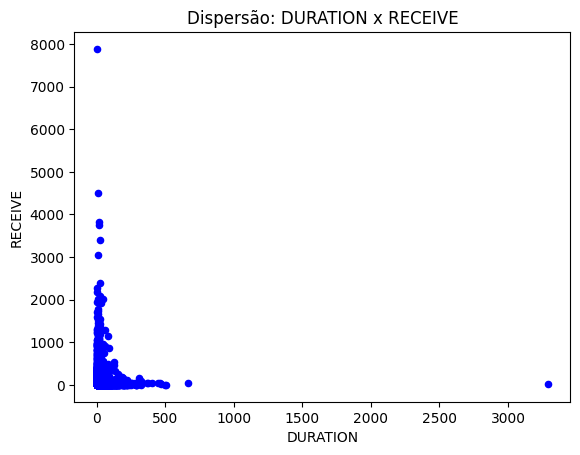

In [57]:
df.plot.scatter(x='DURATION',y='RECEIVE',color='blue')
plt.title('Dispersão: DURATION x RECEIVE')
plt.savefig(f"./lista6/durationxreceive.png", dpi=300)  # Increase the resolution
plt.draw()

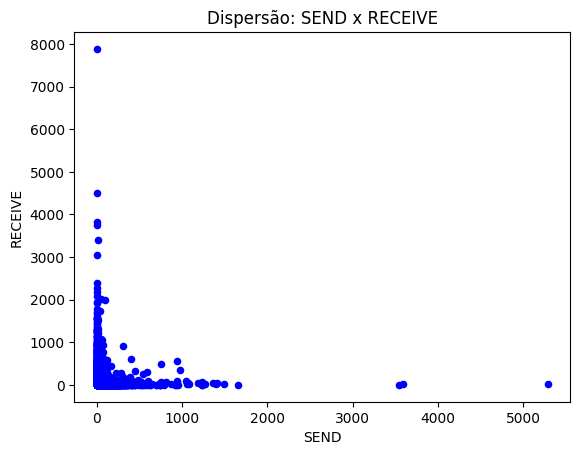

In [58]:
df.plot.scatter(x='SEND',y='RECEIVE',color='blue')
plt.title('Dispersão: SEND x RECEIVE')
plt.savefig(f"./lista6/sendxreceive.png", dpi=300)  # Increase the resolution
plt.draw()

In [59]:

# Calculate max, min and the ratio for each of the specified columns
max_values = df[['DURATION', 'SEND', 'RECEIVE']].max()
min_values = df[['DURATION', 'SEND', 'RECEIVE']].min()
ratios = max_values / min_values

# Create a new DataFrame with max, min, and ratio rows
custom_df = pd.DataFrame([max_values, min_values, ratios], index=['max', 'min', 'ratio'])
custom_df

,DURATION,SEND,RECEIVE
max,3291.2337,5292.1058,7883.9459
min,0.0761,0.0051,0.0358
ratio,43267.9087,1046051.9552,220159.0361


In [60]:
import numpy as np

# Apply log transformation to non-negative values in the DataFrame
# We add a small constant to avoid taking the log of zero in case you have zeros in your DataFrame.
df_transformed = df.copy()

df_transformed['DURATION'] = np.log1p(df_transformed['DURATION'])
df_transformed['SEND'] = np.log1p(df_transformed['SEND'])
df_transformed['RECEIVE'] = np.log1p(df_transformed['RECEIVE'])

df_transformed.head()


,Unnamed: 0,DATA,DURATION,HORA,IP,RECEIVE,SEND,DURATION_rank,SEND_rank,RECEIVE_rank
213612,213612,2015-01-24,3.0470,11:44:00,192.168.18.105,1.4755,0.9906,0.8319,0.3674,0.1936
276964,276964,2015-01-20,2.6261,10:35:00,192.168.9.120,5.9865,0.3398,0.7079,0.1315,0.9828
7566,7566,2015-01-29,1.9406,05:59:00,192.168.39.59,6.6529,2.7235,0.3810,0.7919,0.9935
101717,101717,2015-01-14,2.0612,03:19:00,192.168.18.234,1.4361,0.8500,0.4431,0.3195,0.1858
271326,271326,2015-01-29,1.6524,10:43:00,192.168.36.37,0.5732,1.7388,0.2891,0.5848,0.0415


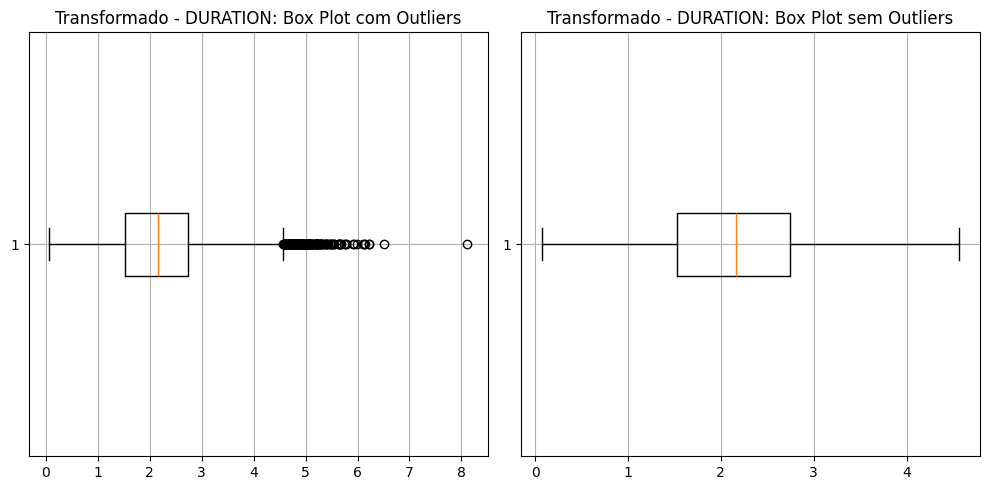

In [61]:
# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# First box plot with outliers
axs[0].boxplot(df_transformed['DURATION'], vert=False)
axs[0].grid(True, zorder=10)
axs[0].set_title('Transformado - DURATION: Box Plot com Outliers')

# Second box plot without outliers
axs[1].boxplot(df_transformed['DURATION'], vert=False, showfliers=False)
axs[1].grid(True, zorder=10)
axs[1].set_title('Transformado - DURATION: Box Plot sem Outliers')

# Show the plot
plt.tight_layout()
plt.savefig(f"./lista6/tf_duration_bloxpot.png", dpi=300)  # Increase the resolution
plt.show()

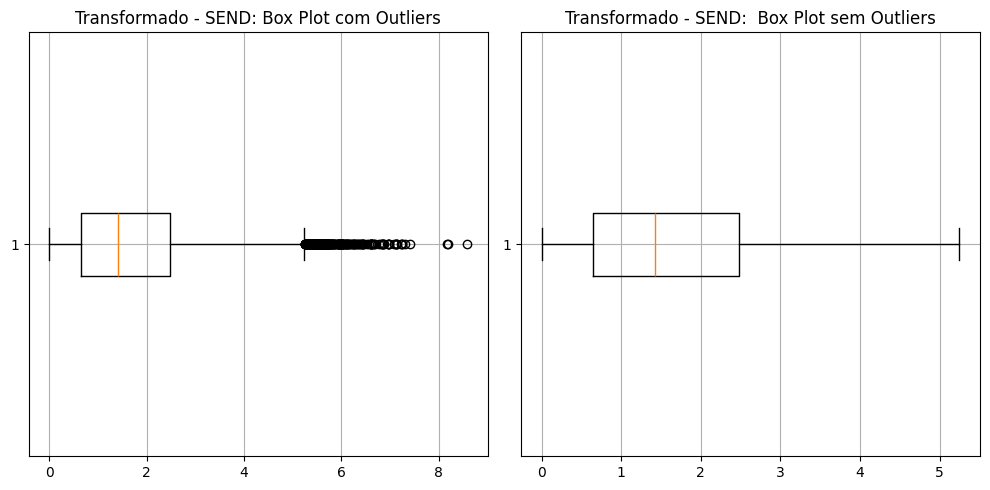

In [62]:
# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# First box plot with outliers
axs[0].boxplot(df_transformed['SEND'], vert=False)
axs[0].grid(True, zorder=10)
axs[0].set_title('Transformado - SEND: Box Plot com Outliers')

# Second box plot without outliers
axs[1].boxplot(df_transformed['SEND'], vert=False, showfliers=False)
axs[1].grid(True, zorder=10)
axs[1].set_title('Transformado - SEND:  Box Plot sem Outliers')

# Show the plot
plt.tight_layout()
plt.savefig(f"./lista6/tf_send_bloxpot.png", dpi=300)  # Increase the resolution

plt.show()

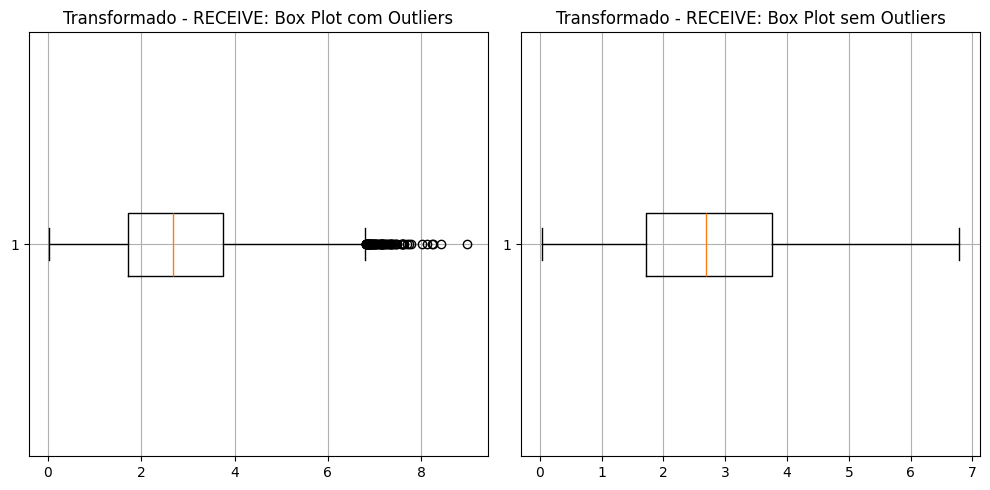

In [63]:
# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# First box plot with outliers
axs[0].boxplot(df_transformed['RECEIVE'], vert=False)
axs[0].grid(True, zorder=10)
axs[0].set_title('Transformado - RECEIVE: Box Plot com Outliers')

# Second box plot without outliers
axs[1].boxplot(df_transformed['RECEIVE'], vert=False, showfliers=False)
axs[1].grid(True, zorder=10)
axs[1].set_title('Transformado - RECEIVE: Box Plot sem Outliers')

# Show the plot
plt.tight_layout()
plt.savefig(f"./lista6/tf_receive_bloxpot.png", dpi=300)  # Increase the resolution

plt.show()

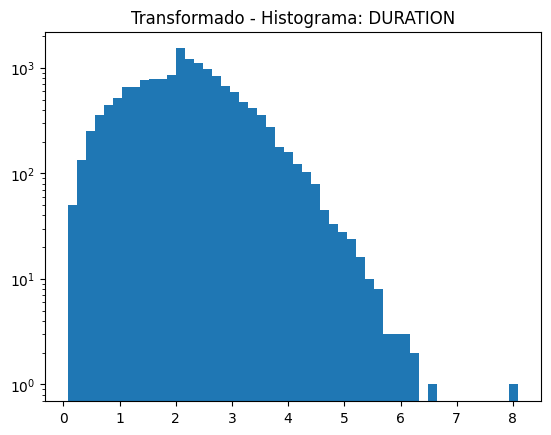

In [64]:
plt.title('Transformado - Histograma: DURATION')
plt.hist(df_transformed['DURATION'], 50, log=True)
plt.savefig(f"./lista6/tf_duration_hist.png", dpi=300)  # Increase the resolution
plt.show()

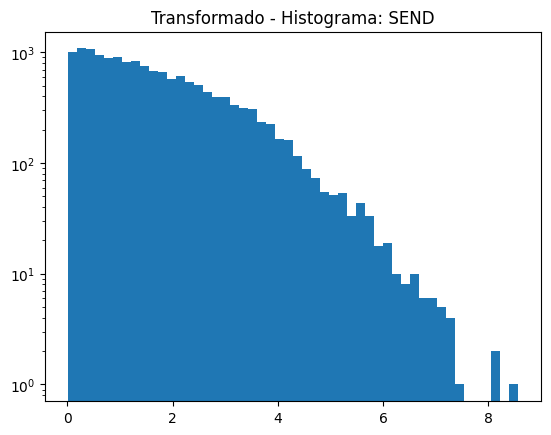

In [65]:
plt.title('Transformado - Histograma: SEND')
plt.hist(df_transformed['SEND'], 50, log=True)
plt.savefig(f"./lista6/tf_send_hist.png", dpi=300)  # Increase the resolution

plt.show()

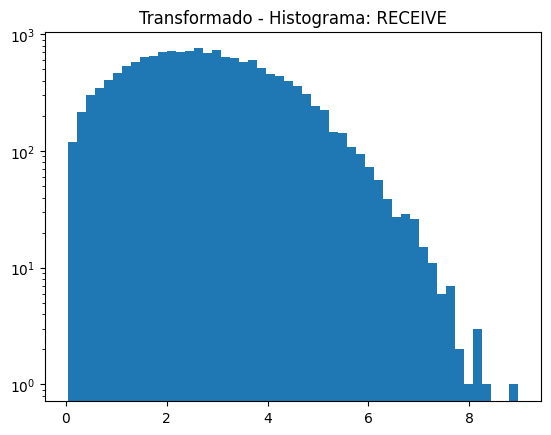

In [66]:
plt.title('Transformado - Histograma: RECEIVE')
plt.hist(df_transformed['RECEIVE'], 50, log=True)
plt.savefig(f"./lista6/tf_receive_hist.png", dpi=300)  # Increase the resolution

plt.show()

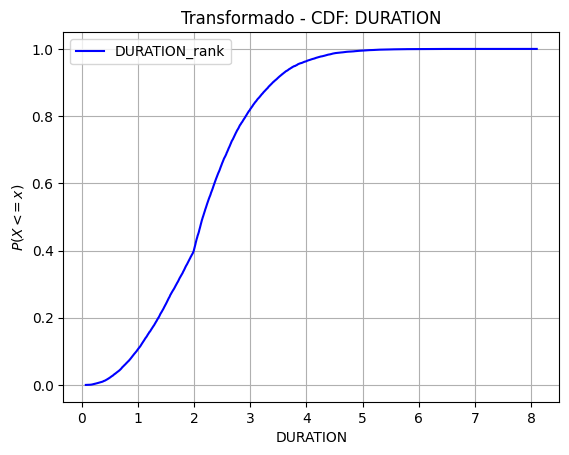

In [67]:
df_transformed['DURATION_rank'] = df_transformed['DURATION'].rank(method = 'average', pct = True)
df_transformed.sort_values('DURATION').plot(x = 'DURATION', y = 'DURATION_rank', grid = True,
 color='blue')
plt.ylabel(r"$P(X <\!\!= x)$")
plt.title("Transformado - CDF: DURATION")
plt.savefig(f"./lista6/tf_duration_cdf.png", dpi=300)  # Increase the resolution
plt.draw()

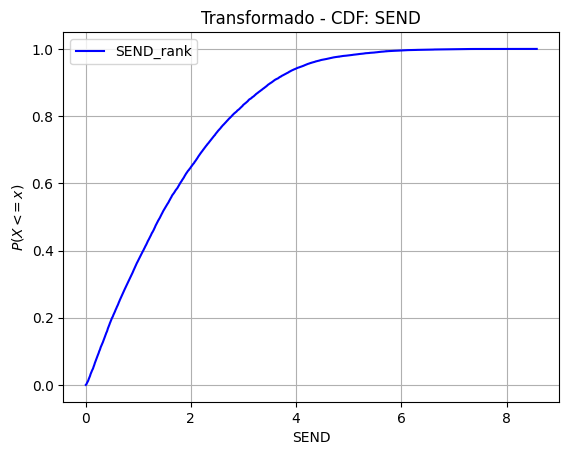

In [68]:
df_transformed['SEND_rank'] = df_transformed['SEND'].rank(method = 'average', pct = True)
df_transformed.sort_values('SEND').plot(x = 'SEND', y = 'SEND_rank', grid = True,
 color='blue')
plt.ylabel(r"$P(X <\!\!= x)$")
plt.title("Transformado - CDF: SEND")
plt.savefig(f"./lista6/tf_send_cdf.png", dpi=300)  # Increase the resolution
plt.draw()

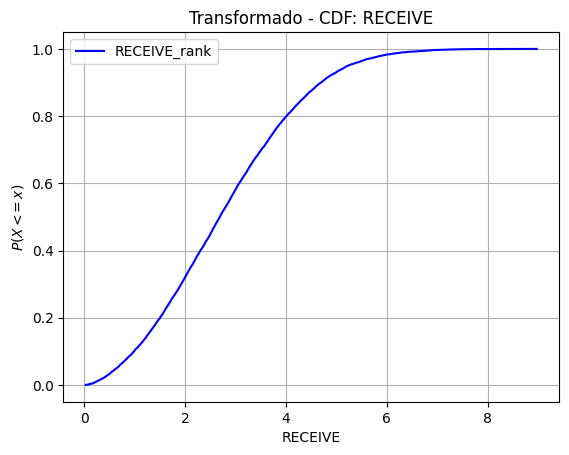

In [69]:
df_transformed['RECEIVE_rank'] = df_transformed['RECEIVE'].rank(method = 'average', pct = True)
df_transformed.sort_values('RECEIVE').plot(x = 'RECEIVE', y = 'RECEIVE_rank', grid = True,
 color='blue')
plt.ylabel(r"$P(X <\!\!= x)$")
plt.title("Transformado - CDF: RECEIVE")
plt.savefig(f"./lista6/tf_receive_cdf.png", dpi=300)  # Increase the resolution
plt.draw()

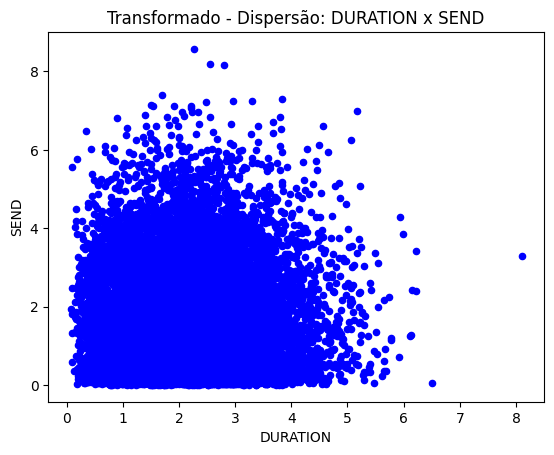

In [70]:
df_transformed.plot.scatter(x='DURATION',y='SEND',color='blue')
plt.title('Transformado - Dispersão: DURATION x SEND')
plt.savefig(f"./lista6/tf_durationxsend.png", dpi=300)  # Increase the resolution
plt.draw()

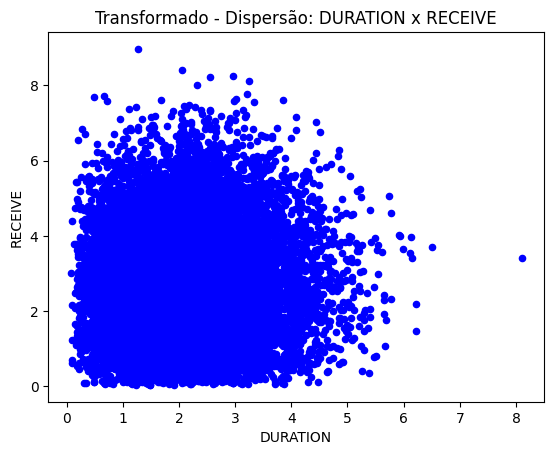

In [71]:
df_transformed.plot.scatter(x='DURATION',y='RECEIVE',color='blue')
plt.title('Transformado - Dispersão: DURATION x RECEIVE')
plt.savefig(f"./lista6/tf_durationxreceive.png", dpi=300)  # Increase the resolution

plt.draw()

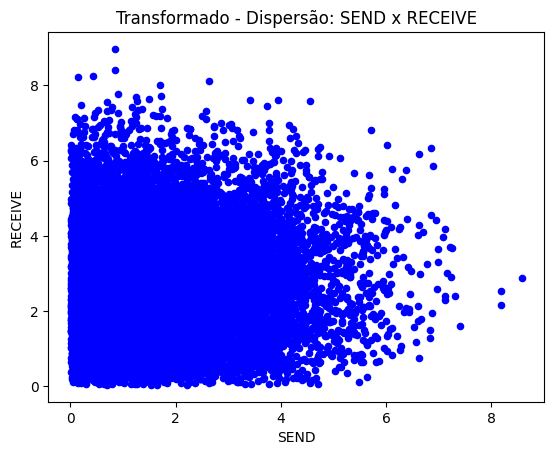

In [72]:
df_transformed.plot.scatter(x='SEND',y='RECEIVE',color='blue')
plt.title('Transformado - Dispersão: SEND x RECEIVE')
plt.savefig(f"./lista6/tf_sendxreceive.png", dpi=300)  # Increase the resolution

plt.draw()

In [73]:
df = df_transformed
pca = PCA(n_components=3)
X=df[['DURATION','SEND','RECEIVE']].values
pca.fit(X)
X_pca = pca.transform(X)
pca.explained_variance_ratio_

array([0.43990085, 0.36910836, 0.1909908 ])

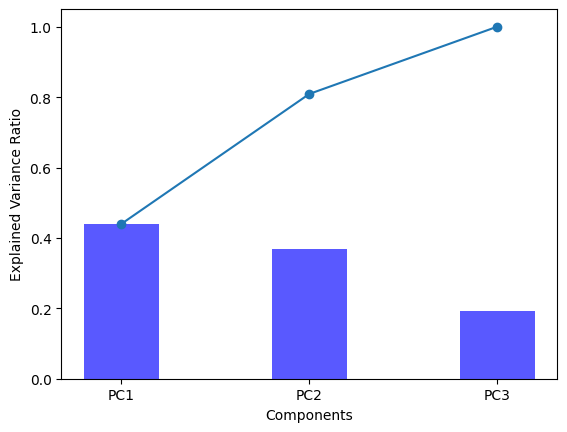

In [74]:
components=['PC1','PC2','PC3']
explain_var_cum=np.cumsum(pca.explained_variance_ratio_)
plt.plot(components, explain_var_cum, marker='o')
plt.bar(components, pca.explained_variance_ratio_, color ='blue',
 width = 0.4, alpha=0.65)
plt.xlabel('Components')
plt.ylabel('Explained Variance Ratio')
plt.savefig(f"./lista6/pca_components.png", dpi=300)  # Increase the resolution
plt.draw()

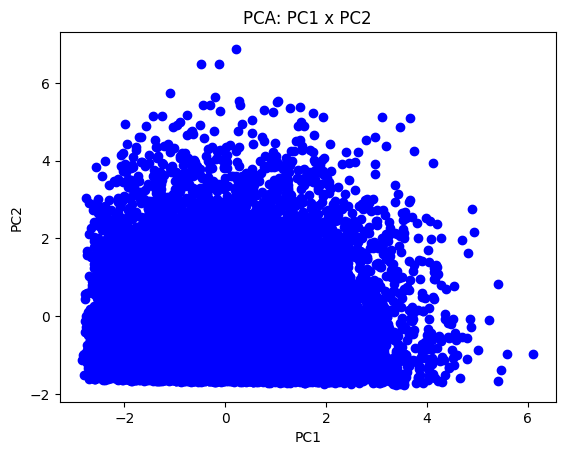

In [75]:
plt.scatter(X_pca[:, 0], X_pca[:, 1],color='blue')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA: PC1 x PC2')
plt.savefig(f"./lista6/pc1xpc2.png", dpi=300)  # Increase the resolution
plt.draw()


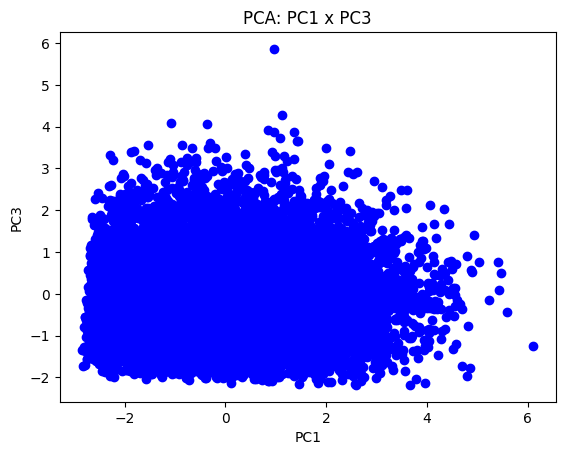

In [83]:
plt.scatter(X_pca[:, 0], X_pca[:, 2],color='blue')
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.title('PCA: PC1 x PC3')
plt.savefig(f"./lista6/pc1xpc3.png", dpi=300)  # Increase the resolution
plt.draw()


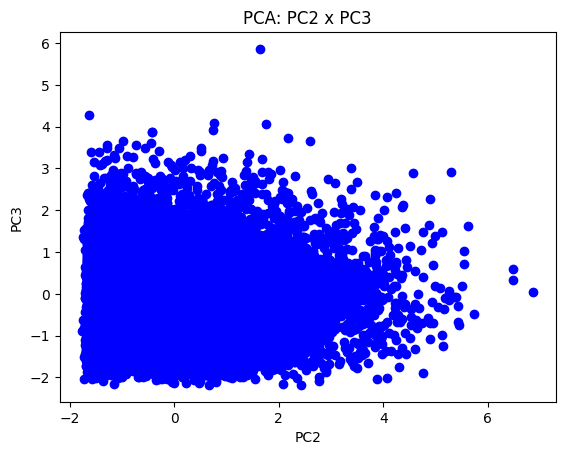

In [84]:
plt.scatter(X_pca[:, 1], X_pca[:, 2],color='blue')
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.title('PCA: PC2 x PC3')
plt.savefig(f"./lista6/pc2xpc3.png", dpi=300)  # Increase the resolution
plt.draw()


In [76]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import numpy as np
import time

lsilhouette = []
lknumber = range(2, 19)

for k in lknumber:
    # SEMENTE de número aleatório
    np.random.seed(int(time.time()))
    rand_number = np.random.randint(2**11)
    
    # execução do algoritmo para cada valor de k
    kmeans = KMeans(n_clusters=k, random_state=rand_number)
    kmeans.fit(X_pca)  # X_pca é a variável que contém os componentes principais

    # Rótulos de cada cluster
    cluster_labels = kmeans.labels_

    # Cálculo do índice de Silhouette
    silhouette = silhouette_score(X_pca, cluster_labels, metric='euclidean')
    
    # armazenando no vetor o valor de cada índice
    lsilhouette.append(silhouette)

    print("Rand number = %d, K = %d: %.2f" % (rand_number, k, silhouette))


Rand number = 277, K = 2: 0.28
Rand number = 618, K = 3: 0.30
Rand number = 1859, K = 4: 0.25
Rand number = 1040, K = 5: 0.25
Rand number = 1097, K = 6: 0.24
Rand number = 124, K = 7: 0.24
Rand number = 1176, K = 8: 0.24
Rand number = 928, K = 9: 0.23
Rand number = 640, K = 10: 0.23
Rand number = 1988, K = 11: 0.23
Rand number = 825, K = 12: 0.23
Rand number = 1010, K = 13: 0.23
Rand number = 1148, K = 14: 0.22
Rand number = 822, K = 15: 0.23
Rand number = 2010, K = 16: 0.23
Rand number = 1187, K = 17: 0.23
Rand number = 1890, K = 18: 0.23


In [77]:
n_of_clusters = lknumber[lsilhouette.index(max(lsilhouette))]
np.random.seed(int(time.time()))
rand_number=np.random.randint(2**8)
kmeans = KMeans(n_clusters=n_of_clusters, random_state=rand_number)
# Para realizar a clusterização deve-se utilizar os componentes principais ue somam pelo menos 85% da variação explicada
kmeans.fit(X_pca)  # X_pca é a variável que contém os componentes principais
cluster_labels=kmeans.labels_
df['cluster']=cluster_labels

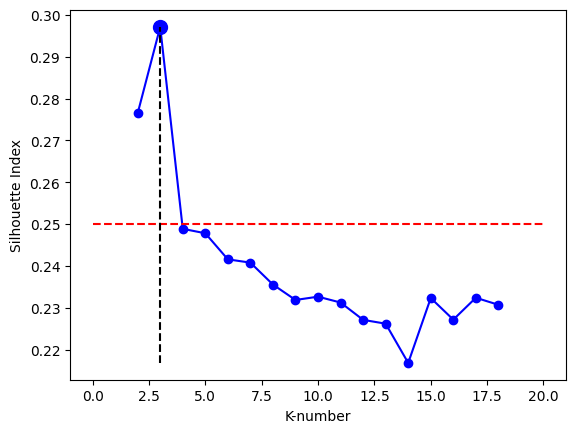

In [78]:
k = lknumber[lsilhouette.index(max(lsilhouette))]
best = max(lsilhouette)
plt.plot(lknumber, lsilhouette, color='blue', ls='-',
         marker='o')
plt.plot(np.linspace(0,20,20), [0.25]*20, color='red',ls="--")
plt.plot([k]*20, np.linspace(min(lsilhouette), best, 20), color='k', ls='--')
plt.scatter(k, best, color='blue',
            s=100)
plt.xlabel('K-number')
plt.ylabel('Silhouette Index')
plt.savefig(f"./lista6/silhouette.png", dpi=300)  # Increase the resolution


In [90]:
dt0 = df[df.cluster == 0].describe()
dt0=dt0[['DURATION','SEND','RECEIVE']]
dt0.loc['cv']=dt0.loc['std'].values/dt0.loc['mean'].values
dt0.loc['range']=dt0.loc['max'].values - dt0.loc['min'].values
dt0.loc['median'] = dt0.median()
dt0.loc['total'] = dt0.sum()
dt0.loc['variance'] = dt0.var()
dt0

,DURATION,SEND,RECEIVE
count,6640.0000,6640.0000,6640.0000
mean,2.1306,1.0262,1.7874
std,0.9419,0.6726,0.7792
min,0.0733,0.0050,0.0352
25%,1.4321,0.4369,1.1915
50%,2.1105,0.9413,1.8449
75%,2.7239,1.5504,2.4423
max,5.7827,2.7597,3.1962
cv,0.4421,0.6554,0.4359
range,5.7094,2.7546,3.1610


In [91]:
dt1 = df[df.cluster == 1].describe()
dt1=dt1[['DURATION','SEND','RECEIVE']]
dt1.loc['cv']=dt1.loc['std'].values/dt1.loc['mean'].values
dt1.loc['range']=dt1.loc['max'].values - dt1.loc['min'].values
dt1.loc['median'] = dt1.median()
dt1.loc['total'] = dt1.sum()
dt1.loc['variance'] = dt1.var()
dt1

,DURATION,SEND,RECEIVE
count,5100.0000,5100.0000,5100.0000
mean,2.2604,1.2622,4.2801
std,0.9134,0.8598,0.9057
min,0.0945,0.0057,2.9342
25%,1.6641,0.5525,3.5756
50%,2.2194,1.1490,4.1145
75%,2.7849,1.8456,4.8025
max,6.5028,4.7008,8.9727
cv,0.4041,0.6812,0.2116
range,6.4083,4.6952,6.0385


In [92]:
dt2 = df[df.cluster == 2].describe()
dt2=dt2[['DURATION','SEND','RECEIVE']]
dt2.loc['cv']=dt2.loc['std'].values/dt2.loc['mean'].values
dt2.loc['range']=dt2.loc['max'].values - dt2.loc['min'].values
dt2.loc['median'] = dt2.median()
dt2.loc['total'] = dt2.sum()
dt2.loc['variance'] = dt2.var()
dt2

,DURATION,SEND,RECEIVE
count,3760.0000,3760.0000,3760.0000
mean,2.1926,3.4760,2.5402
std,0.9365,0.9445,1.0895
min,0.0915,2.0257,0.0469
25%,1.5335,2.7802,1.7718
50%,2.1530,3.2928,2.5442
75%,2.7259,3.9518,3.2550
max,8.0993,8.5742,6.8139
cv,0.4271,0.2717,0.4289
range,8.0078,6.5484,6.7670


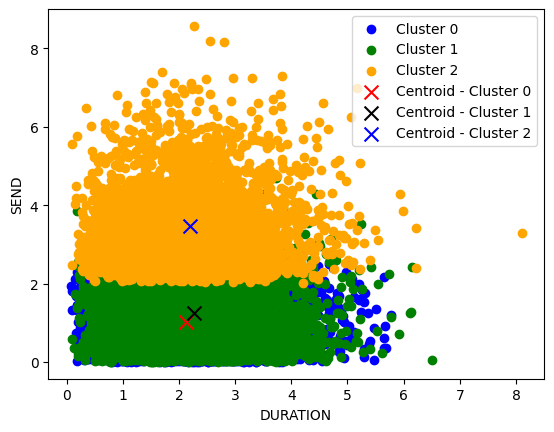

In [82]:
plt.scatter(df[df.cluster == 0]['DURATION'].values,
 df[df.cluster == 0]['SEND'].values, color='blue', label=f'Cluster 0' )
plt.scatter(df[df.cluster == 1]['DURATION'].values,
 df[df.cluster == 1]['SEND'].values, color='green', label=f'Cluster 1')
plt.scatter(df[df.cluster == 2]['DURATION'].values,
 df[df.cluster == 2]['SEND'].values, color='orange', label=f'Cluster 2')

# Agrupa apenas as colunas numéricas de interesse e calcule a média
cluster_summary = df.groupby('cluster')[['DURATION', 'SEND']].mean()

centroid_0 = cluster_summary.loc[0]
centroid_1 = cluster_summary.loc[1]
centroid_2 = cluster_summary.loc[2]
plt.scatter(centroid_0['DURATION'], centroid_0['SEND'], color='red', marker='x', s=100, label=f'Centroid - Cluster 0')
plt.scatter(centroid_1['DURATION'], centroid_1['SEND'], color='black', marker='x', s=100, label=f'Centroid - Cluster 1')
plt.scatter(centroid_2['DURATION'], centroid_2['SEND'], color='blue', marker='x', s=100, label=f'Centroid - Cluster 2')


plt.xlabel('DURATION')
plt.ylabel('SEND')
plt.legend()
plt.savefig(f"./lista6/cluster_centroids.png", dpi=300)  # Increase the resolution
plt.show()

